# Naive Bayes

Objective: Predict attendence of interview appoinment    
Dataset: interview.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('interview.csv')
print(data.shape)
data.head()

(967, 15)


,Client,Position,Skillset,InterviewType,Gender,StartPermission,Unscheduled,FollowUp,AlternativeContact,Resume,Venue,Letter,ExpectAttend,Attendence,MaritalStat
0,Standard Chartered Bank,Routine,Oracle,Scheduled,Male,Yet to confirm,Yes,Yes,Yes,Yes,No,Not Sure,No,No,Married
1,Standard Chartered Bank,Routine,Oracle,Scheduled,Male,Yes,Yes,Yes,Yes,Yes,Yes,Not Sure,No,No,Married
2,Pfizer,Niche,Senior software engineer-Mednet,Scheduled,Male,No,No,Yes,No,Yes,No,No,No,No,Married
3,UST,Dot Net,Routine,Scheduled,Male,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Married
4,Pfizer,Niche,Senior software engineer-Mednet,Scheduled,Male,No,No,Yes,Yes,No,No,Not Sure,No,No,Married


## Data Exploration

Yes          885
No            41
Uncertain     40
Name: ExpectAttend, dtype: int64


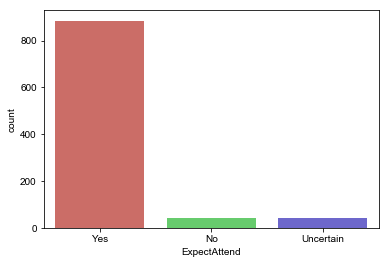

In [2]:
print(data['ExpectAttend'].value_counts())

sns.countplot(x='ExpectAttend',data = data, palette='hls',order = data['ExpectAttend'].value_counts().index)
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

Male      756
Female    210
Name: Gender, dtype: int64


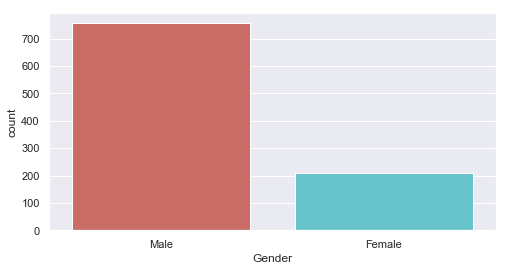

In [3]:
print(data['Gender'].value_counts())

sns.countplot(x='Gender',data = data, palette='hls',order = data['Gender'].value_counts().index)
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

Yes    674
No     292
Name: Attendence, dtype: int64


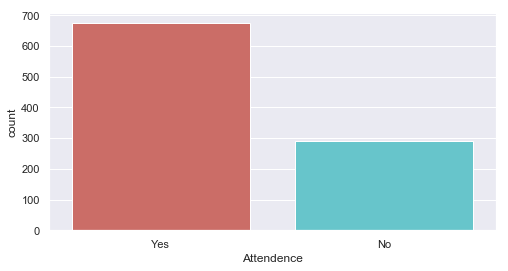

In [4]:
print(data['Attendence'].value_counts())

sns.countplot(x='Attendence',data = data, palette='hls',order = data['Attendence'].value_counts().index)
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

## Convert Categorical to Numerical

In [5]:
data["Client"]  = data["Client"].astype('category')
data["Client#"] = data["Client"].cat.codes

data["Position"]  = data["Position"].astype('category')
data["Position#"] = data["Position"].cat.codes

data["Skillset"]  = data["Skillset"].astype('category')
data["Skillset#"] = data["Skillset"].cat.codes

data["InterviewType"]  = data["InterviewType"].astype('category')
data["InterviewType#"] = data["InterviewType"].cat.codes

data["Gender"]  = data["Gender"].astype('category')
data["Gender#"] = data["Gender"].cat.codes

data["StartPermission"]  = data["StartPermission"].astype('category')
data["StartPermission#"] = data["StartPermission"].cat.codes

data["Unscheduled"]  = data["Unscheduled"].astype('category')
data["Unscheduled#"] = data["Unscheduled"].cat.codes

data["FollowUp"]  = data["FollowUp"].astype('category')
data["FollowUp#"] = data["FollowUp"].cat.codes

data["AlternativeContact"]  = data["AlternativeContact"].astype('category')
data["AlternativeContact#"] = data["AlternativeContact"].cat.codes

data["Resume"]  = data["Resume"].astype('category')
data["Resume#"] = data["Resume"].cat.codes

data["Venue"]  = data["Venue"].astype('category')
data["Venue#"] = data["Venue"].cat.codes

data["Letter"]  = data["Letter"].astype('category')
data["Letter#"] = data["Letter"].cat.codes

data["ExpectAttend"]  = data["ExpectAttend"].astype('category')
data["ExpectAttend#"] = data["ExpectAttend"].cat.codes

data["Attendence"]  = data["Attendence"].astype('category')
data["Attendence#"] = data["Attendence"].cat.codes

data["MaritalStat"]  = data["MaritalStat"].astype('category')
data["MaritalStat#"] = data["MaritalStat"].cat.codes

data.head(2)

,Client,Position,Skillset,InterviewType,Gender,StartPermission,Unscheduled,FollowUp,AlternativeContact,Resume,...,StartPermission#,Unscheduled#,FollowUp#,AlternativeContact#,Resume#,Venue#,Letter#,ExpectAttend#,Attendence#,MaritalStat#
0,Standard Chartered Bank,Routine,Oracle,Scheduled,Male,Yet to confirm,Yes,Yes,Yes,Yes,...,3,2,1,1,2,0,1,0,0,0
1,Standard Chartered Bank,Routine,Oracle,Scheduled,Male,Yes,Yes,Yes,Yes,Yes,...,2,2,1,1,2,1,1,0,0,0


## Correlation

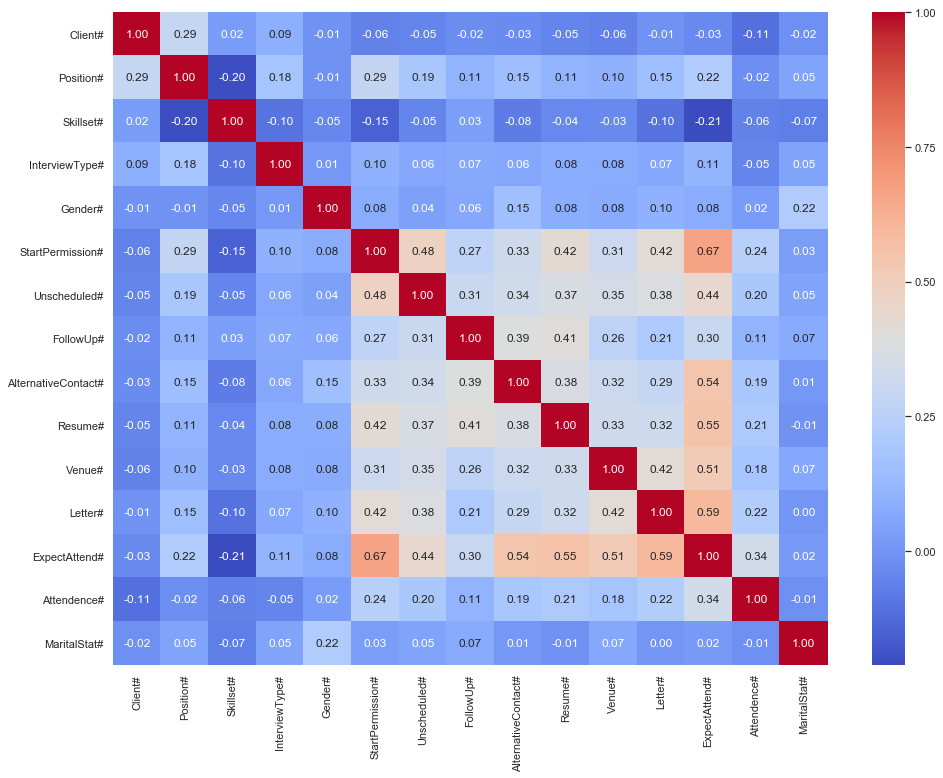

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [7]:
corr_rank = data.corr()
corr_rank["Attendence#"].sort_values(ascending=False)

Attendence#            1.000000
ExpectAttend#          0.342125
StartPermission#       0.239940
Letter#                0.224308
Resume#                0.206257
Unscheduled#           0.197750
AlternativeContact#    0.191527
Venue#                 0.178477
FollowUp#              0.109270
Gender#                0.024430
MaritalStat#          -0.014943
Position#             -0.020838
InterviewType#        -0.049927
Skillset#             -0.059779
Client#               -0.109805
Name: Attendence#, dtype: float64

## Data Processing and Selection

In [8]:
X = data[['ExpectAttend#','StartPermission#','Letter#','Resume#','Unscheduled#','AlternativeContact#',
            'Venue#','FollowUp#','Gender#','MaritalStat#','Position#','InterviewType#','Skillset#','Client#']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (967, 14)


array([[ 0,  3,  1,  2,  2,  1,  0,  1,  1,  0,  4,  0, 55, 10],
       [ 0,  2,  1,  2,  2,  1,  1,  1,  1,  0,  4,  0, 55, 10]],
      dtype=int8)

In [9]:
y = data["Attendence#"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (967,)


0    0
1    0
2    0
3    0
4    0
Name: Attendence#, dtype: int8

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (967, 14)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-4.14635698,  3.07203874, -3.19072833,  0.15704726,  0.10982168,
         0.17621033, -6.55461427,  0.10857488,  0.52672799, -1.30428776,
         0.37178551, -0.44197209,  1.04869304,  0.37467323],
       [-4.14635698,  0.18509854, -3.19072833,  0.15704726,  0.10982168,
         0.17621033,  0.13842902,  0.10857488,  0.52672799, -1.30428776,
         0.37178551, -0.44197209,  1.04869304,  0.37467323]])

## Split Train Test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (773, 14) (773,)
X TEST Set :  (194, 14) (194,)


## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nbayes = GaussianNB()
nbayes.fit(X_train,y_train)

y_pred = nbayes.predict(X_test)
nbayes.score(X_train,y_train)

print('Naive Bayes Accuracy Score:', round(metrics.accuracy_score(y_test,y_pred),4))

Naive Bayes Accuracy Score: 0.7732


## Test Prediction

In [13]:
df_pred1 = data[data.index == 1]
df_pred2 = data[data.index == 700]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Client,Position,Skillset,InterviewType,Gender,StartPermission,Unscheduled,FollowUp,AlternativeContact,Resume,...,StartPermission#,Unscheduled#,FollowUp#,AlternativeContact#,Resume#,Venue#,Letter#,ExpectAttend#,Attendence#,MaritalStat#
1,Standard Chartered Bank,Routine,Oracle,Scheduled,Male,Yes,Yes,Yes,Yes,Yes,...,2,2,1,1,2,1,1,0,0,0
700,Standard Chartered Bank,Routine,CDD KYC,Scheduled,Male,Yes,Yes,Yes,Yes,Yes,...,2,2,1,1,2,1,2,2,1,1


In [14]:
Xp = df_pred[['ExpectAttend#','StartPermission#','Letter#','Resume#','Unscheduled#','AlternativeContact#',
              'Venue#','FollowUp#','Gender#','MaritalStat#','Position#','InterviewType#','Skillset#','Client#']].values
yp = df_pred["Attendence#"]
Xp = scaler.transform(Xp)

pred = nbayes.predict(Xp)
pred

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([0, 1], dtype=int8)